In [1]:
import numpy as np 
import pandas as pd

In [2]:
df_basic=pd.read_excel('/Users/merrillsequeira/Documents/docs/UPGRAD_PGDDS_MODULES/INEURON_INTERNSHIP/entertain_proj/Entertainer - Basic Info.xlsx')
df_brk=pd.read_excel('/Users/merrillsequeira/Documents/docs/UPGRAD_PGDDS_MODULES/INEURON_INTERNSHIP/entertain_proj/Entertainer - Breakthrough Info.xlsx')
df_last=pd.read_excel('/Users/merrillsequeira/Documents/docs/UPGRAD_PGDDS_MODULES/INEURON_INTERNSHIP/entertain_proj/Entertainer - Last work Info.xlsx')

In [3]:
df_basic.columns, df_brk.columns, df_last.columns

(Index(['Entertainer', 'Gender (traditional)', 'Birth Year'], dtype='object'),
 Index(['Entertainer', 'Year of Breakthrough/#1 Hit/Award Nomination',
        'Breakthrough Name', 'Year of First Oscar/Grammy/Emmy'],
       dtype='object'),
 Index(['Entertainer', 'Year of Last Major Work (arguable)', 'Year of Death'], dtype='object'))

In [4]:
len(df_basic.Entertainer) , len(df_brk.Entertainer) , len(df_last.Entertainer),  df_basic.Entertainer.nunique(), df_brk.Entertainer.nunique(), df_last.Entertainer.nunique()

(70, 70, 70, 70, 70, 70)

In [5]:
#performing joins on 'Entertainer' cols 

df=df_basic.merge(df_brk,on='Entertainer').merge(df_last,on='Entertainer')


In [6]:
df.head()

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death
0,Adele,F,1988,2008,19,2009.0,2016,NaN
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN


#### some pre EDA tasks 
- rename cols
- make age columns from 'year of death' or 'todays date' - 'birth year' column 
- one hot encode gender 
- make all dates datetime 

In [7]:
df.columns

Index(['Entertainer', 'Gender (traditional)', 'Birth Year',
       'Year of Breakthrough/#1 Hit/Award Nomination', 'Breakthrough Name',
       'Year of First Oscar/Grammy/Emmy', 'Year of Last Major Work (arguable)',
       'Year of Death'],
      dtype='object')

In [8]:
df.rename(columns={'Gender (traditional)':'Gender','Birth Year':'Birth_Year','Year of Breakthrough/#1 Hit/Award Nomination': 'Yr_of_breakout','Breakthrough Name':'breakthrough_movie','Year of First Oscar/Grammy/Emmy':'yr_of_first_award','Year of Last Major Work (arguable)':'last_major_work','Year of Death':'yr_of_death'},  inplace=True)

In [9]:
df.head()

,Entertainer,Gender,Birth_Year,Yr_of_breakout,breakthrough_movie,yr_of_first_award,last_major_work,yr_of_death
0,Adele,F,1988,2008,19,2009.0,2016,NaN
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Entertainer         70 non-null     object 
 1   Gender              70 non-null     object 
 2   Birth_Year          70 non-null     int64  
 3   Yr_of_breakout      70 non-null     int64  
 4   breakthrough_movie  70 non-null     object 
 5   yr_of_first_award   64 non-null     float64
 6   last_major_work     70 non-null     int64  
 7   yr_of_death         30 non-null     float64
dtypes: float64(2), int64(3), object(3)
memory usage: 4.9+ KB


In [11]:
df.head()

,Entertainer,Gender,Birth_Year,Yr_of_breakout,breakthrough_movie,yr_of_first_award,last_major_work,yr_of_death
0,Adele,F,1988,2008,19,2009.0,2016,NaN
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN


In [12]:
#ohe for gender - 1 represents male 
def ohe(x): 
    if x=="M": 
        return 1 
    else: 
        return 0 
df['Gender']=df['Gender'].apply(lambda x: ohe(x))    

In [13]:
df.Gender.value_counts()

1    50
0    20
Name: Gender, dtype: int64

In [14]:
df.yr_of_death.isnull().sum()

40

In [15]:
df['yr_of_death']=df['yr_of_death'].fillna(0)

In [16]:
#Birth_Year == y
#yr_of_death == x

def calc_age(x,y): 
    today=pd.to_datetime('today').year
    if x==0: 
        return today-y
    else: 
        return x-y

In [17]:
df['age']=df[['yr_of_death','Birth_Year']].apply(lambda x: calc_age(*x),axis=1 )

In [18]:
df.head()

,Entertainer,Gender,Birth_Year,Yr_of_breakout,breakthrough_movie,yr_of_first_award,last_major_work,yr_of_death,age
0,Adele,0,1988,2008,19,2009.0,2016,0.0,33.0
1,Angelina Jolie,0,1975,1999,"Girl, Interrupted",1999.0,2016,0.0,46.0
2,Aretha Franklin,0,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,0.0,79.0
3,Bette Davis,0,1908,1934,Of Human Bondage,1935.0,1989,1989.0,81.0
4,Betty White,0,1922,1952,Life with Elilzabeth,1976.0,2016,0.0,99.0


In [19]:
df['breakout_age']=df['Yr_of_breakout']-df['Birth_Year']
df['age_of_award']=df['yr_of_first_award']-df['Birth_Year']
df['age_of_lastmajorwork']=df['last_major_work']-df['Birth_Year']

In [20]:
df.columns

Index(['Entertainer', 'Gender', 'Birth_Year', 'Yr_of_breakout',
       'breakthrough_movie', 'yr_of_first_award', 'last_major_work',
       'yr_of_death', 'age', 'breakout_age', 'age_of_award',
       'age_of_lastmajorwork'],
      dtype='object')

In [21]:
df2=df.drop(columns=['Birth_Year','Yr_of_breakout','yr_of_first_award','last_major_work','yr_of_death'],axis=1)

In [22]:
df2.head()

,Entertainer,Gender,breakthrough_movie,age,breakout_age,age_of_award,age_of_lastmajorwork
0,Adele,0,19,33.0,20,21.0,28
1,Angelina Jolie,0,"Girl, Interrupted",46.0,24,24.0,41
2,Aretha Franklin,0,I Never Loved a Man (The Way I Love You),79.0,25,26.0,72
3,Bette Davis,0,Of Human Bondage,81.0,26,27.0,81
4,Betty White,0,Life with Elilzabeth,99.0,30,54.0,94


In [23]:
df_add_credits=pd.read_csv('/Users/merrillsequeira/Documents/docs/UPGRAD_PGDDS_MODULES/INEURON_INTERNSHIP/extra_data/imdb_top_1000.csv')


In [24]:
new_act_db1=df_add_credits.groupby(['Star1']).sum() 
new_act_db2=df_add_credits.groupby(['Star2']).sum() 
new_act_db3=df_add_credits.groupby(['Star3']).sum() 
new_act_db4=df_add_credits.groupby(['Star4']).sum() 

In [25]:
len(new_act_db1), len(new_act_db2), len(new_act_db3), len(new_act_db4)

(660, 841, 891, 939)

In [26]:
len(new_act_db1)+ len(new_act_db2)+ len(new_act_db3)+ len(new_act_db4)

3331

In [27]:
df_actors_add=pd.concat([new_act_db1, new_act_db2, new_act_db3, new_act_db4], keys=['Star1', 'Star2','Star3','Star4']).reset_index()


In [28]:
#df_actors_add.head()
df_actors_add.rename(columns={'level_1':'Entertainer'},  inplace=True)
df_actors_add.drop(columns='level_0',inplace=True)

In [29]:
#joining with df2 & df_actors_add 

df_f=df2.merge(df_actors_add,on='Entertainer',how='inner')

In [30]:
#df_f.to_excel('actors_db.xlsx')

In [32]:
df_f.head()

,Entertainer,Gender,breakthrough_movie,age,breakout_age,age_of_award,age_of_lastmajorwork,IMDB_Rating,Meta_score,No_of_Votes
0,Angelina Jolie,0,"Girl, Interrupted",46.0,24,24.0,41,7.7,63.0,239203
1,Bette Davis,0,Of Human Bondage,81.0,26,27.0,81,16.3,173.0,170597
2,Carole Lombard,0,Twentieth Century,34.0,26,NaN,34,8.2,86.0,29915
3,Carrie Fisher,0,Star Wars,60.0,21,NaN,60,33.2,306.0,3536921
4,Cary Grant,1,"She Done Him Wrong, I'm No Angel",82.0,29,66.0,62,47.9,377.0,642511


#### performing k means clustering for the celebrities 

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#### checking for outliers 

In [34]:
nums=['age','breakout_age','age_of_award','age_of_lastmajorwork','IMDB_Rating','Meta_score','No_of_Votes']

<Figure size 360x360 with 0 Axes>

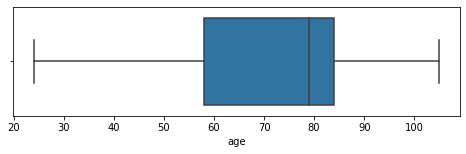

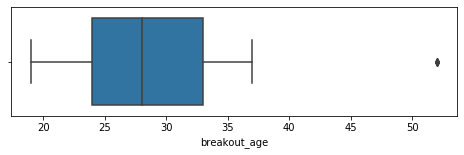

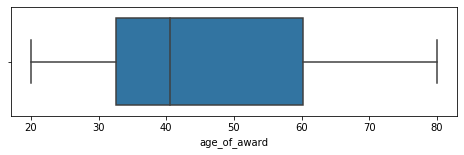

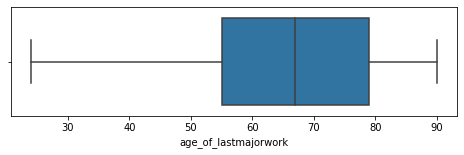

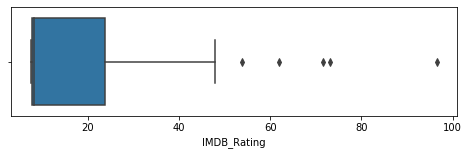

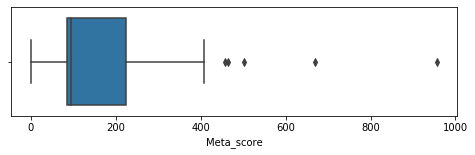

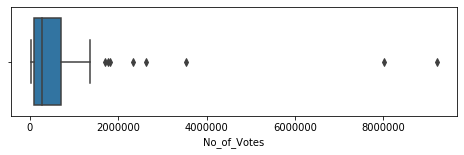

In [37]:

plt.figure(figsize = (5,5))
for t in  nums:
    plt.subplots(1,1, figsize = (8,2)) 
    sns.boxplot(x = t, data = df_f)    

In [38]:
# removing (statistical) outliers
Q1 = df_f.No_of_Votes.quantile(0.05)
Q3 = df_f.No_of_Votes.quantile(0.95)
IQR = Q3 - Q1
df_f = df_f[(df_f.No_of_Votes >= Q1 - 1.5*IQR) & (df_f.No_of_Votes <= Q3 + 1.5*IQR)]


Q1 = df_f.Meta_score.quantile(0.05)
Q3 = df_f.Meta_score.quantile(0.95)
IQR = Q3 - Q1
df_f = df_f[(df_f.Meta_score >= Q1 - 1.5*IQR) & (df_f.Meta_score <= Q3 + 1.5*IQR)]

#IMDB_Rating

Q1 = df_f.IMDB_Rating.quantile(0.05)
Q3 = df_f.IMDB_Rating.quantile(0.95)
IQR = Q3 - Q1
df_f = df_f[(df_f.IMDB_Rating >= Q1 - 1.5*IQR) & (df_f.IMDB_Rating <= Q3 + 1.5*IQR)]



In [39]:
# 2. rescaling
rfm_df = df_f[['age','breakout_age','age_of_award','age_of_lastmajorwork','IMDB_Rating','Meta_score','No_of_Votes']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(59, 7)

In [40]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['age','breakout_age','age_of_award','age_of_lastmajorwork','IMDB_Rating','Meta_score','No_of_Votes']
rfm_df_scaled.head()


,age,breakout_age,age_of_award,age_of_lastmajorwork,IMDB_Rating,Meta_score,No_of_Votes
0,-1.318821,-0.750509,-1.200964,-1.435387,-0.622814,-0.774313,-0.433368
1,0.507715,-0.491562,-1.020318,0.950185,-0.025431,0.166577,-0.530838
2,-1.945061,-0.491562,NaN,-1.852862,-0.588082,-0.577582,-0.730707
3,-0.588206,-1.138930,NaN,-0.302240,1.148497,1.304198,4.251751
4,0.559902,-0.103140,1.328086,-0.182961,2.169605,1.911500,0.139618


In [42]:
rfm_df_scaled.fillna(0,inplace=True)

In [44]:
rfm_df_scaled.head()

,age,breakout_age,age_of_award,age_of_lastmajorwork,IMDB_Rating,Meta_score,No_of_Votes
0,-1.318821,-0.750509,-1.200964,-1.435387,-0.622814,-0.774313,-0.433368
1,0.507715,-0.491562,-1.020318,0.950185,-0.025431,0.166577,-0.530838
2,-1.945061,-0.491562,0.000000,-1.852862,-0.588082,-0.577582,-0.730707
3,-0.588206,-1.138930,0.000000,-0.302240,1.148497,1.304198,4.251751
4,0.559902,-0.103140,1.328086,-0.182961,2.169605,1.911500,0.139618


In [45]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
kmeans.labels_

array([0, 3, 0, 2, 2, 3, 0, 0, 3, 2, 3, 3, 3, 3, 2, 3, 0, 3, 2, 3, 3, 3,
       2, 0, 0, 0, 0, 3, 0, 2, 3, 2, 0, 0, 3, 3, 0, 0, 0, 3, 3, 3, 2, 1,
       1, 1, 1, 3, 3, 2, 3, 3, 3, 3, 3, 3, 0, 0, 0], dtype=int32)

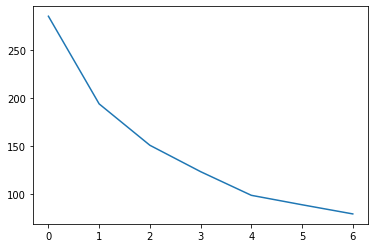

In [47]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

In [48]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.2718835691806645
For n_clusters=3, the silhouette score is 0.3196098826073381
For n_clusters=4, the silhouette score is 0.34819925222057135
For n_clusters=5, the silhouette score is 0.3454182396514351
For n_clusters=6, the silhouette score is 0.3167230501063443
For n_clusters=7, the silhouette score is 0.2918722457625551
For n_clusters=8, the silhouette score is 0.29697253252933686


In [49]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [50]:
kmeans.labels_

array([1, 0, 1, 2, 2, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0,
       0, 0, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [51]:
# assign the label
df_f['cluster_id'] = kmeans.labels_
df_f.head()

,Entertainer,Gender,breakthrough_movie,age,breakout_age,age_of_award,age_of_lastmajorwork,IMDB_Rating,Meta_score,No_of_Votes,cluster_id
0,Angelina Jolie,0,"Girl, Interrupted",46.0,24,24.0,41,7.7,63.0,239203,1
1,Bette Davis,0,Of Human Bondage,81.0,26,27.0,81,16.3,173.0,170597,0
2,Carole Lombard,0,Twentieth Century,34.0,26,NaN,34,8.2,86.0,29915,1
3,Carrie Fisher,0,Star Wars,60.0,21,NaN,60,33.2,306.0,3536921,2
4,Cary Grant,1,"She Done Him Wrong, I'm No Angel",82.0,29,66.0,62,47.9,377.0,642511,2


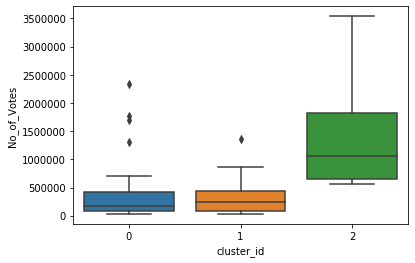

In [52]:
# plot
sns.boxplot(x='cluster_id', y='No_of_Votes', data=df_f)

In [53]:
df_f.to_excel('actors_db2_wtlabels.xlsx')